# Code To Reproduce Analysis Of The HNTT From Section 5.1 Of The Paper

Setup and load dataset of human subject responses

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu

%matplotlib inline

file1 = 'data/HNTT_data.csv' #HNTT raw data

df = pd.read_csv(file1, header=0) 
df1 = df[df.studyno==1]
df2 = df[df.studyno==2]

# Analyze Subject's Responses For Study 1

<Figure size 900x900 with 0 Axes>

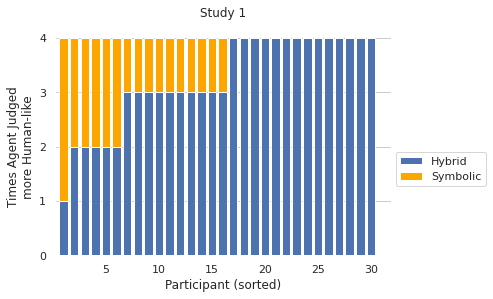

In [35]:
nsubjs1= int(len(df1)/10)  # because each subj has 10 rows

sub_judg=np.zeros(nsubjs1)
totalresp=[]
countzero=0
count_sym1 = np.zeros(nsubjs1+1)
count_hyb1 = np.zeros(nsubjs1+1)

# Accuracy & Certainty for questions 1-6
subj_acc1  = np.zeros(nsubjs1+1)
subj_cert1 = np.zeros(nsubjs1+1)


for sno in range(1,nsubjs1+1):
    d1_s = df1[df1['subjno'] == sno ]
    
    # determine responses
    sresp = d1_s.loc[: , "subj_resp"]
    vida  = d1_s.loc[:,  "vidA_type"]
    vidb  = d1_s.loc[:,  "vidB_type"]

    resp, vid_a, vid_b = [], [],[]

    for element in vida: 
        vid_a.append(element)
    for element in vidb: 
        vid_b.append(element)
        
    for i, element in enumerate(sresp): 
        if element =='A':
            resp.append(vid_a[i])
        elif element =='B':
            resp.append(vid_b[i])
        elif element =='0':
            resp.append(0)
            countzero+=1
    
    # Hybrid vs. symbolic agent responses for questions 6:10
    count_hyb1[sno] = resp[6:10].count(2)
    count_sym1[sno] = resp[6:10].count(3)
    
    # Accuracy & Certainty
    sresp_ha  = d1_s[['subj_resp']].iloc[0:6]  # responses for human vs agent questions
    ground    = d1_s[['ground']].iloc[0:6]
    compare   = sresp_ha['subj_resp']==ground['ground']
    
    acc = len(compare[compare == True].index)/compare.count()
    subj_acc1[sno] = acc
    meancert       = np.mean(d1_s[['certainty']].iloc[0:6] ) # certainty for human vs. agent questions
    subj_cert1[sno]     = meancert

cert1 = subj_cert1[1:]  # first item  0
acc1  = subj_acc1[1:]

verbose_sanity_check=0 # set to 1 if you want to inspect the results with your eye
if verbose_sanity_check:
    print(count_hyb1[1:nsubjs1])
    print(resp)
    resp[6:10].count(2)
    print(count_sym1[1:nsubjs1])
    print(np.sum(count_hyb1[1:nsubjs1])/len(count_hyb1[1:nsubjs1]))
    print(np.sum(count_sym1[1:nsubjs1])/len(count_sym1[1:nsubjs1]))
    print(countzero)
    len(count_sym1[1:nsubjs1])



############
# PLOT FIGURE
############

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}

plt.rc('font', **font)
plt.figure(figsize=(3,3), dpi= 300)
f, ax = plt.subplots()
xtics = range(0, nsubjs1+1)

# SORT ACCORDING TO RESPONSES
sorted_ind= np.argsort(count_hyb1) # get the indices of sorted hybrid, used below for count_symb
count_hyb1.sort() # sort hybrid

plt.bar( xtics, count_hyb1, label="Hybrid")
plt.bar( xtics, count_sym1[sorted_ind], bottom=count_hyb1, label="Symbolic", color='orange')

ax.legend(ncol=1, frameon=True, loc='upper left',  bbox_to_anchor=(1, 0.5))
plt.xlim((.25, nsubjs1+1.85))
plt.yticks([0, 1, 2, 3, 4], ('0', '1', '2', '3', '4') ) 
ax.set(title="Study 1\n", ylabel="Times Agent Judged\nmore Human-like", xlabel="Participant (sorted)")
sns.despine(left=True, bottom=True)

Responses in direct comparisons of symbolic and hybrid agents in Study 1 (Figure 8 left). 

Y-axis: number of times a participant judged an agent more human-like (out of $4$). 

X-axis: participants, ordered by how often they chose the hybrid agent.

# Analyze Subject's Responses For Study 2


<Figure size 900x900 with 0 Axes>

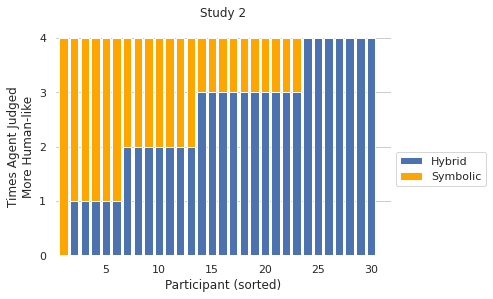

In [36]:
df1 = df[df.studyno==1]
df2 = df[df.studyno==2]

nsubjs2= int(len(df2)/10)  # because each subj has 10 rows

sub_judg=np.zeros(nsubjs2)
totalresp=[]
countzero=0
count_sym2 = np.zeros(nsubjs2+1)
count_hyb2 = np.zeros(nsubjs2+1)

# Accuracy & Certainty for questions 1-6
subj_acc2  = np.zeros(nsubjs2+1)
subj_cert2      = np.zeros(nsubjs2+1)

for sno in range(1,nsubjs2+1):
    d2_s = df2[df2['subjno'] == sno ]
    
    sresp = d2_s.loc[: , "subj_resp"]
    vida  = d2_s.loc[:,  "vidA_type"]
    vidb  = d2_s.loc[:,  "vidB_type"]

    resp, vid_a, vid_b = [], [],[]

    for element in vida: 
        vid_a.append(element)
    for element in vidb: 
        vid_b.append(element)
        
    for i, element in enumerate(sresp): 
        if element =='A':
            resp.append(vid_a[i])
        elif element =='B':
            resp.append(vid_b[i])
        else:
            resp.append(0)
            countzero+=1

    count_hyb2[sno] = resp[6:10].count(2)
    count_sym2[sno] = resp[6:10].count(3)
    
    # Accuracy & Certainty
    sresp_ha  = d2_s[['subj_resp']].iloc[0:6]  #responses for human vs agent questions
    ground    = d2_s[['ground']].iloc[0:6]
    compare   = sresp_ha['subj_resp']==ground['ground']  #this subj responses for human-agent comparison
    
    acc = len(compare[compare == True].index)/compare.count()
    subj_acc2[sno] = acc
    meancert       = np.mean(d2_s[['certainty']].iloc[0:6] ) # certainty for human vs agent questions
    subj_cert2[sno]     = meancert

cert2 = subj_cert2[1:]  # first item  0
acc2  = subj_acc2[1:]

verbose_sanity_check=0 # set to 1 if you want to inspect the results with your eye
if verbose_sanity_check:
    print(count_hyb2[1:nsubjs2])
    print(resp)
    resp[6:10].count(2)
    print(count_sym2[1:nsubjs2])
    print(np.sum(count_hyb2[1:nsubjs2])/len(count_hyb2[1:nsubjs2]))
    print(np.sum(count_sym2[1:nsubjs2])/len(count_sym2[1:nsubjs2]))
    print(countzero)
    len(count_sym2[1:nsubjs2])


############
# PLOT FIGURE
############


font = {'family' : 'DejaVu Sans', 
        'weight' : 'normal',
        'size'   : 24}

plt.rc('font', **font)
plt.figure(figsize=(3,3), dpi= 300)
f, ax = plt.subplots()
xtics = range(0, nsubjs2+1) 

sorted_ind= np.argsort(count_hyb2) # get the indices of sorted hybrid, used below for count_symb
count_hyb2.sort() # sort hybrid

plt.bar( xtics, count_hyb2, label="Hybrid")
plt.bar( xtics, count_sym2[sorted_ind], bottom=count_hyb2, label="Symbolic", color='orange')
ax.legend(ncol=1, frameon=True, loc='upper left',  bbox_to_anchor=(1, 0.5))
plt.xlim((.25, nsubjs2+1.85))

plt.yticks([0, 1, 2, 3, 4], ('0', '1', '2', '3', '4') ) 
ax.set(title="Study 2\n", ylabel="Times Agent Judged\nMore Human-like", xlabel="Participant (sorted)")
sns.despine(left=True, bottom=True)

Responses in direct comparisons of symbolic and hybrid agents in Study 1 (Figure 8 right). 

Y-axis: number of times a participant judged an agent more human-like (out of $4$). 

X-axis: participants, ordered by how often they chose the hybrid agent.

# Accuracy - Violin Plot (Figure 7 Left)

([<matplotlib.axis.XTick at 0x7f580df44c50>,
 [Text(0, 0, 'Study 1\n(n=30)'), Text(1, 0, 'Study 2\n(n=30)')])

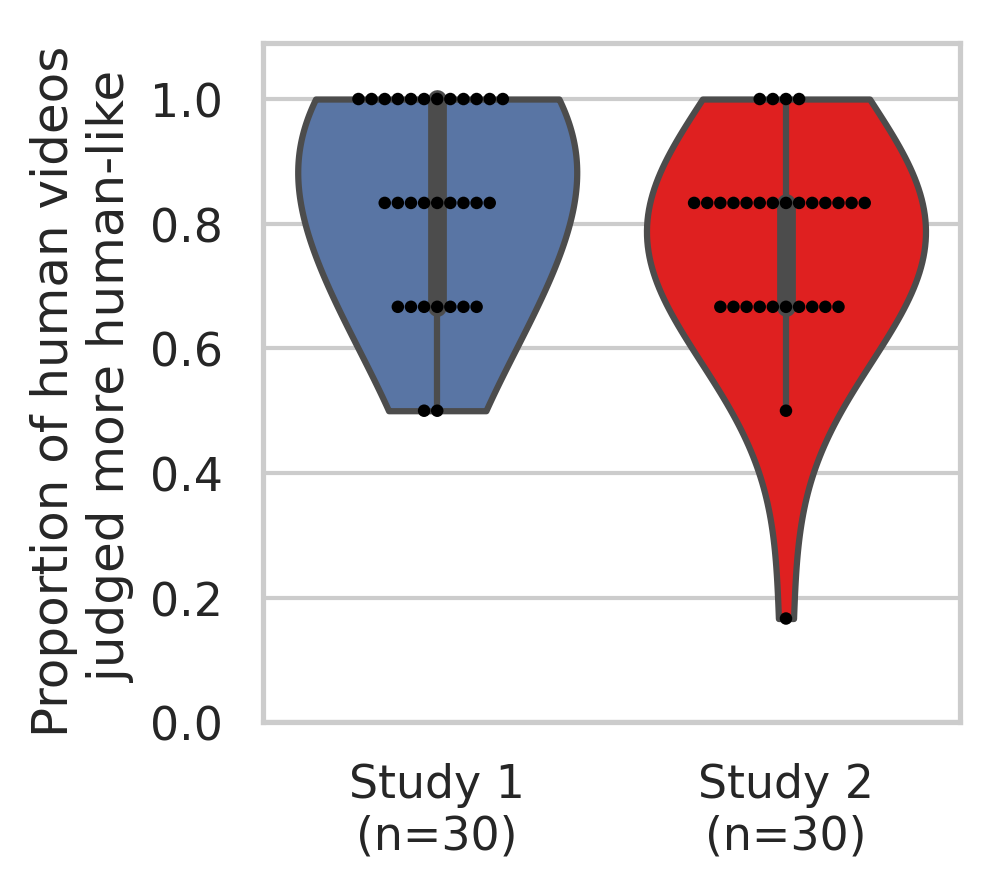

In [40]:

plt.figure(figsize=(3,3), dpi= 300)
sns.set(style="whitegrid")
fig1=sns.violinplot(data=[ acc1, -1+acc1*0], bw=1, cut=0)
sns.swarmplot(data=[ acc1, -1+acc1*0], color='black', size=3)
sns.violinplot(data=[ -1+acc2*0, acc2], bw=1, cut=0, color='red')
sns.swarmplot(data=[ -1+acc2*0, acc2], color='black', size=3)
plt.ylim((0, 1.09))
fig1.set(title="", ylabel="Proportion of human videos \n judged more human-like")
plt.xticks([0 , 1], (f'Study 1\n(n={len(acc1)})', f'Study 2\n(n={len(acc2)})'))


# Uncertainty - Violin Plot (Figure 7 Right)

([<matplotlib.axis.XTick at 0x7f580fe8d898>,
 [Text(0, 0, 'Study 1\n(n=30)'), Text(1, 0, 'Study 2\n(n=30)')])

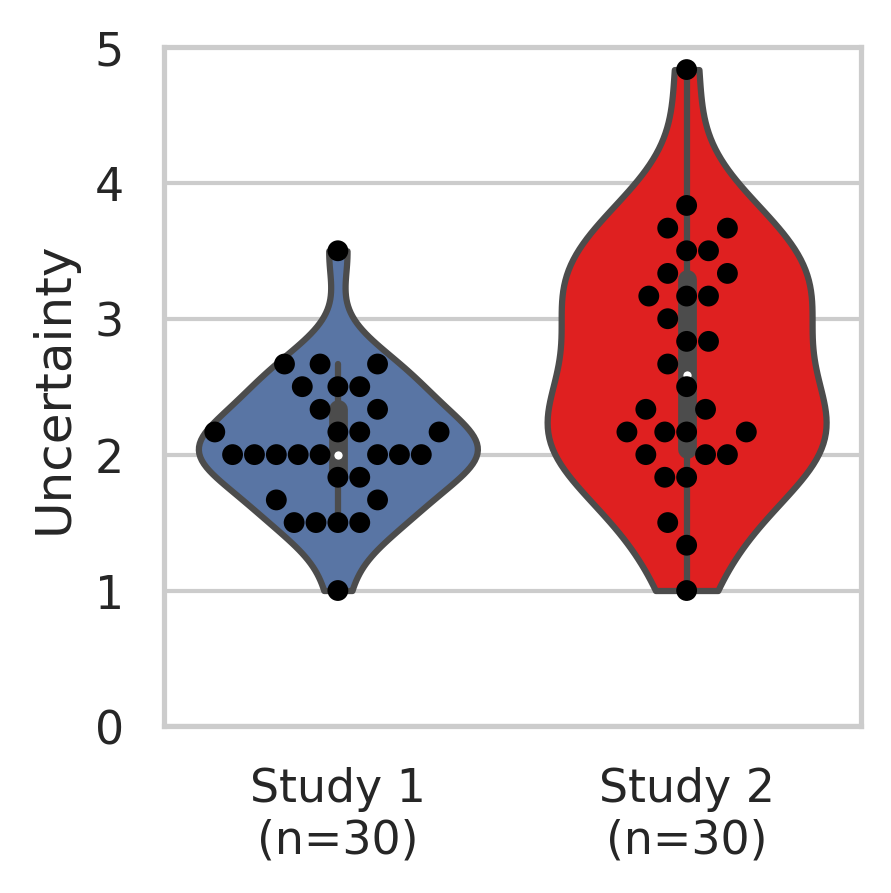

In [39]:
plt.figure(figsize=(3,3), dpi= 300)
sns.set(style="whitegrid")

fig1=sns.violinplot(data=[ cert1, -5+cert1*0], cut=0)
sns.swarmplot(data=[ cert1, -5+cert1*0], color='black')

sns.violinplot(data=[ -5+cert2*0, cert2], cut=0, color='red')
sns.swarmplot(data=[ -5+cert2*0, cert2], color='black')
plt.ylim((0, 5))

fig1.set(title="", 
         ylabel="Uncertainty")

plt.xticks([0 , 1], (f'Study 1\n(n={len(cert1)})', f'Study 2\n(n={len(cert2)})'))

# Statistics - Accuracy

In [20]:
#Study 1
print(acc1.mean(), acc1.std())

0.8388888888888889 0.15801625170364322


In [21]:
#Study 2
print(acc2.mean(), acc2.std())

0.7666666666666667 0.16442942874387492


In [22]:
#Mann-Whitney U test - Accuracy (Study 1 vs Study 2)

#compare samples
stat, p = mannwhitneyu(acc1, acc2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=341.000, p=0.046
Different distribution (reject H0)


# Statistics - Uncertainty

In [23]:
#Study 1 
print(cert1.mean(), cert1.std())

2.0777777777777775 0.4747969026493665


In [24]:
#Study 2
print(cert2.mean(), cert2.std())

2.661111111111111 0.8394038154738748


In [25]:
#Mann-Whitney U test - Uncertainty (Study 1 vs Study 2)

#compare samples
stat, p = mannwhitneyu(cert1, cert2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=257.500, p=0.002
Different distribution (reject H0)


# Statistics - Hybrid vs Symbolic

In [26]:
#Study 1: percentage of all participants who judged the hybrid agent to be more human-like
(count_hyb1/4).mean(), (count_hyb1/4).std()

(0.782258064516129, 0.2519435379324727)

In [27]:
#Study 2: percentage of all participants who judged the hybrid agent to be more human-like
(count_hyb2/4).mean(), (count_hyb2/4).std()

(0.6209677419354839, 0.29696697805680594)

In [28]:
#Mann-Whitney U test - hybrid vs symbolic agent human likeness (Study 1 vs Study 2)

#compare samples
stat, p = mannwhitneyu(count_hyb1/4, count_hyb2/4)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=328.000, p=0.013
Different distribution (reject H0)
